In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#set color
sns.set_palette("Set2")

In [21]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [7]:
data = pd.read_csv("abalone.csv", header=None)

In [9]:
data.columns = ['Sex', 'Length', 'Diameter','Height', 'Weight', 'Schucked weight','Viscera weight','Shell weight', 'Rings']

In [12]:
# no non-null values good!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex                4177 non-null object
Length             4177 non-null float64
Diameter           4177 non-null float64
Height             4177 non-null float64
Weight             4177 non-null float64
Schucked weight    4177 non-null float64
Viscera weight     4177 non-null float64
Shell weight       4177 non-null float64
Rings              4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [15]:
# no non-zero values good!
data.describe()

,Length,Diameter,Height,Weight,Schucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


/Users/ayim/Desktop/virenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


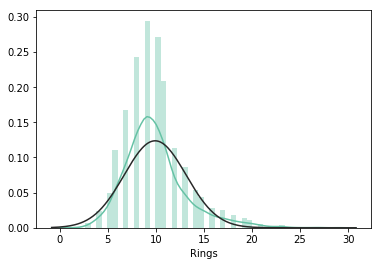

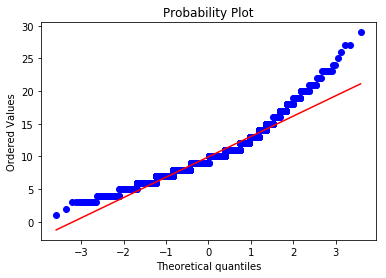

In [28]:
# check out the target var
# kind of normally distributed
sns.distplot(data['Rings'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['Rings'], plot=plt)

# slightly positively skewed, could consider transforming the data
# data['Rings'] = np.log(data['Rings'])

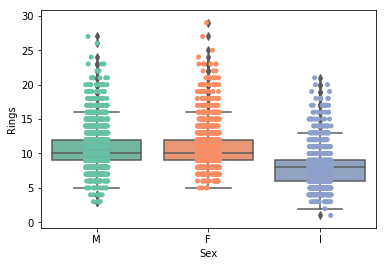

In [19]:
# check out the categorical var
sns.boxplot(x="Sex", y="Rings", data=data)
sns.stripplot(x="Sex", y="Rings", data=data, jitter=True)

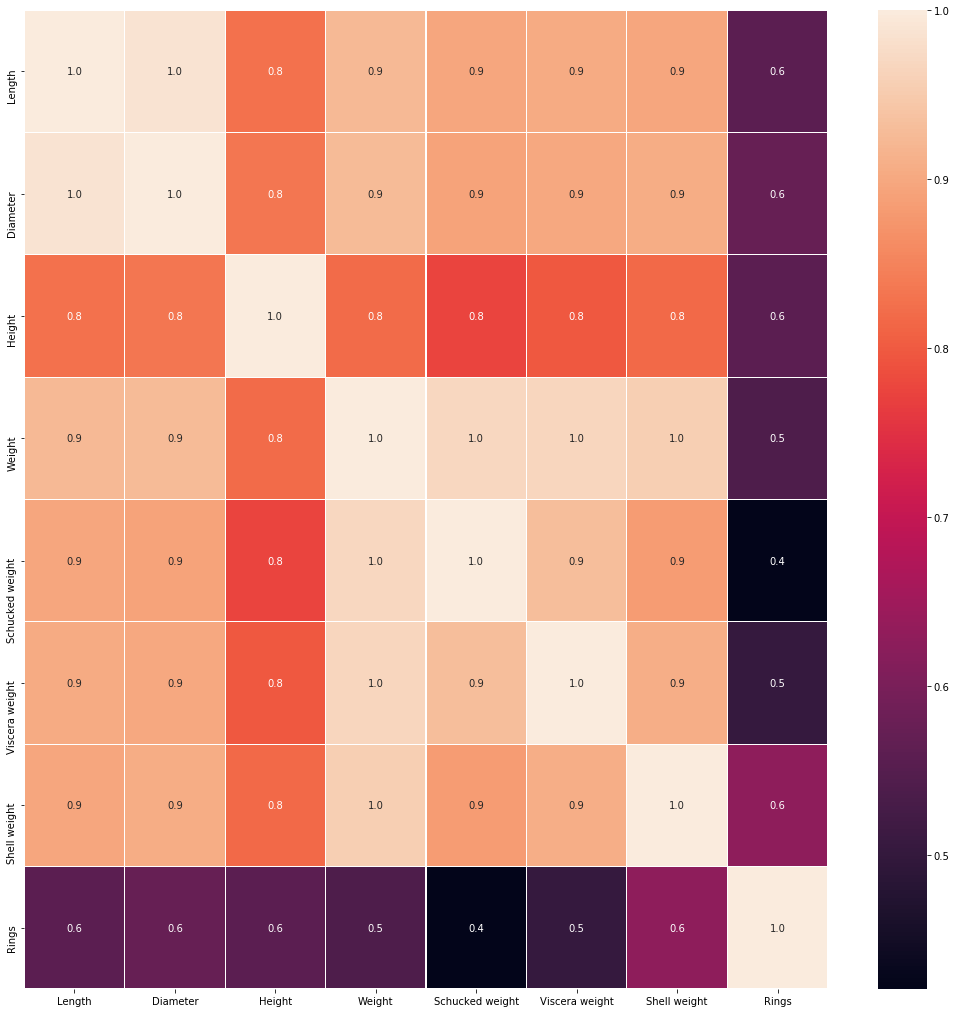

In [29]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(),annot=True, linewidths=.1, fmt= '.1f', ax=ax)

# Lenght and diameter has collinearity, we could drop one of them

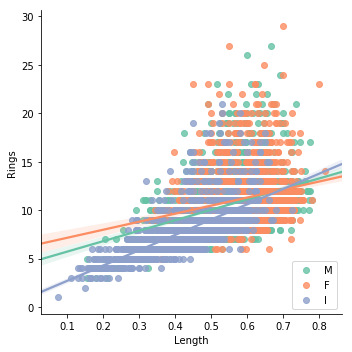

In [30]:
# Looking at the relationship between some cat variable and continuous var
sns.lmplot( x="Length", y="Rings", data=data, fit_reg=True, hue='Sex', legend=False)
plt.legend(loc='lower right')

# Seems the trend is more less the same for adults. but not for infants.

In [47]:
# Convert categorical to dummy variables
#data = pd.get_dummies(data, columns=["Sex"])
data.drop("Sex_M", axis=1, inplace=True)
data.head()

,Length,Diameter,Height,Weight,Schucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1


In [50]:
# Ridge
x = data.drop(['Diameter','Rings'], axis=1)
y = data['Rings']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.47391750767982577


In [53]:
# Lasso
from sklearn.linear_model import Lasso

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  -0.0011938216991020933
Lasso coefficients:  [ 0.  0.  0.  0.  0.  0.  0. -0.]
